#**Business Problem**
XYZ bank wants a data driven approach to assist their decision making for providing loans to the customers. The banks wants to understand if the customer is going to repay the loan or not.

#**Data Science Problem**
Build a classification engine that predicts and classifies if a customer is going to repay the loan or not, based on various features like credit policy, interest rate, installment, revolving balance, etc.


## ***1. Import Libraries and Dependencies***

In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

## ***2. Load Data***

In [3]:
import io
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['loan_data.csv']))

## ***3. Understanding Data***

In [5]:
data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [8]:
data.head(20)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [9]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("Numerical Columns: \n", num_col,"\n")
print("Categorical Columns: \n", categ_col)

Numerical Columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object') 

Categorical Columns: 
 Index(['purpose'], dtype='object')


## ***4. Data Preprocessing***

In [10]:
# Converting Categorical Data to Numerical Data using One Hot Encoding

In [11]:
data = pd.get_dummies(data = data, prefix = 'purpose', columns = ['purpose'])

In [12]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("Numerical Columns: \n", num_col,"\n")
print("Categorical Columns: \n", categ_col)

Numerical Columns: 
 Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business'],
      dtype='object') 

Categorical Columns: 
 Index([], dtype='object')


In [13]:
# Checking for NA values

print(data.isna().sum())
print(data.shape)

credit.policy                 0
int.rate                      0
installment                   0
log.annual.inc                0
dti                           0
fico                          0
days.with.cr.line             0
revol.bal                     0
revol.util                    0
inq.last.6mths                0
delinq.2yrs                   0
pub.rec                       0
not.fully.paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64
(9578, 20)


## ***5. Exploratory Data Analysis***

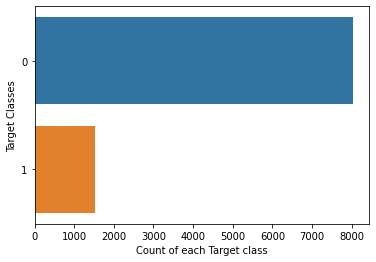

In [14]:
# Checking distribution of y - variable, if it is unbalanced or not

sns.countplot(y = data['not.fully.paid'], data = data)
plt.xlabel('Count of each Target class')
plt.ylabel('Target Classes')
plt.show()

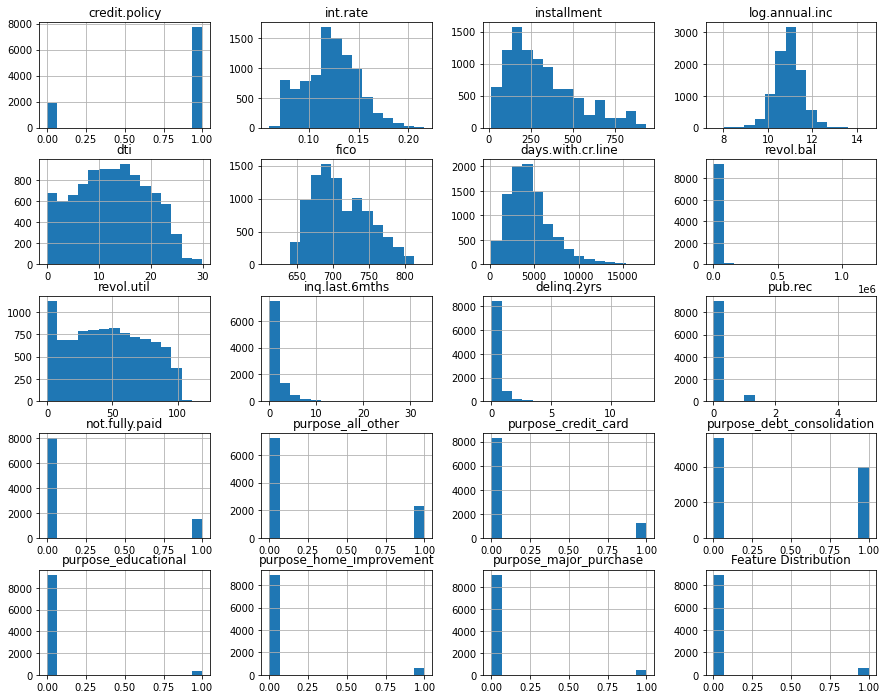

In [15]:
# Check distribution of all features.
data.hist(figsize = (15, 12), bins = 15)
plt.title('Feature Distribution')
plt.show()

## ***6. Model Building***

In [16]:
X = data.drop(['not.fully.paid'], axis = 1)
y = data['not.fully.paid']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1005)

## **Decision Tree Criterion - Gini**

In [21]:
clf = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score:\n ", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n ", classification_report(y_test, y_pred))


Confusion Matrix:
  [[1995  422]
 [ 352  105]]

 Accuracy Score:
  0.7306889352818372

 Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.83      0.84      2417
           1       0.20      0.23      0.21       457

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.53      2874
weighted avg       0.75      0.73      0.74      2874



## **Decision Tree Criterion - Entropy**

In [22]:
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score:\n ", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n ", classification_report(y_test, y_pred))


Confusion Matrix:
  [[2043  374]
 [ 362   95]]

 Accuracy Score:
  0.743910925539318

 Classification Report:
                precision    recall  f1-score   support

           0       0.85      0.85      0.85      2417
           1       0.20      0.21      0.21       457

    accuracy                           0.74      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.75      0.74      0.75      2874



## **Handling Class Imbalance**

In [24]:
#Handle Class Imbalance
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)




/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size = 0.3, random_state = 1005)

In [27]:
clf1 = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score:\n ", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n ", classification_report(y_test, y_pred))


Confusion Matrix:
  [[1954  484]
 [  36 2353]]

 Accuracy Score:
  0.8922726331054485

 Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.80      0.88      2438
           1       0.83      0.98      0.90      2389

    accuracy                           0.89      4827
   macro avg       0.91      0.89      0.89      4827
weighted avg       0.91      0.89      0.89      4827



In [29]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score:\n ", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n ", classification_report(y_test, y_pred))

Confusion Matrix:
  [[1903  535]
 [  37 2352]]

 Accuracy Score:
  0.8814998964159934

 Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.78      0.87      2438
           1       0.81      0.98      0.89      2389

    accuracy                           0.88      4827
   macro avg       0.90      0.88      0.88      4827
weighted avg       0.90      0.88      0.88      4827



In [30]:
dtclassifier = DecisionTreeClassifier()

param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [10, 15, 25, 30, 35, 40, 45, 50]}

grid = GridSearchCV(estimator = dtclassifier, param_grid = param_grid, refit = True, verbose = 0)

In [31]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                

In [32]:
grid_pred = grid.predict(X_test)
print("Confusion Matrix:\n ",confusion_matrix(y_test, y_pred))
print("\n Accuracy Score:\n ", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n ", classification_report(y_test, y_pred)

Confusion Matrix:
  [[1903  535]
 [  37 2352]]

 Accuracy Score:
  0.8814998964159934

 Classification Report:
                precision    recall  f1-score   support

           0       0.98      0.78      0.87      2438
           1       0.81      0.98      0.89      2389

    accuracy                           0.88      4827
   macro avg       0.90      0.88      0.88      4827
weighted avg       0.90      0.88      0.88      4827

